# Project 1: Cardiovascular Disease Data Analysis

## Data Description:

This dataset consists of 70000 patient records and consits of 3 types of input features: Objective: factual information, Examination: results of medical examination, and Subjective: information given by the patient.
The data set includes the following columns:
- Age (days)
- Height (cm)
- Weight (kg)
- Gender
- Systolic blood pressure 
- Diastolic blood pressure
- Cholesterol (1: normal, 2: above normal, 3: well above normal)
- Glucose (1: normal, 2: above normal, 3: well above normal )
- Smoking 
- Alcohol intake 
- Physical activity 

Data Source: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

## Data Wrangling:

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [81]:
df = pd.read_csv("cardio_train.csv", sep = ';')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [266]:
# Function that calculates the median along with the values calculated in the describe function
def describe_plus(df):
    d = df.describe()
    print('Describe:', d)
    
    median_calc = df.median()
    print('Median:', median_calc)

In [267]:
describe_plus(df)

Describe:                  id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.

## Data Analysis:

### Question 1: Which gender is cardiovascular disase most common in?
(Note: 1 = Women and 2 = Men)

In [47]:
df.gender.value_counts()

1    45530
2    24470
Name: gender, dtype: int64

Since there were almost 2000 more women included in this survey than men, this questions should be answered by a porportion.

In [289]:
w = df.query("gender == 1 and cardio == 1").shape[0] / 45530
print(w)

0.4967274324621129


In [131]:
m = df.query("gender == 2 and cardio == 1").shape[0] / 24470
print(m)

0.5052308949734369


The chances for developing cardiovascular disease is slightly higher in men. Men have a 50.5% chance and women have a 49.7% chance.

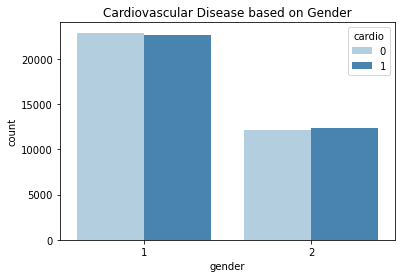

In [124]:
sb.countplot(data = df, x = 'gender', hue = 'cardio', palette = 'Blues')
plt.title('Cardiovascular Disease based on Gender')

plt.show()

### Question 2: Is systolic or diastolic blood pressure more important when predicting cardiovascular disease?

In [200]:
cardio_df= df[df.cardio != 0]

In [84]:
total_cd = df.query('cardio == 1').shape[0]

In [175]:
s = df.query("ap_hi > 120 and cardio == 1").shape[0] / total_cd
print(s)
d = df.query("ap_lo > 80 and cardio == 1").shape[0] / total_cd
print(d)

0.629777866720032
0.4620200691843678


Systolic blood pressure is more important when predicting whether or not the patient will have cardiovascular disease.

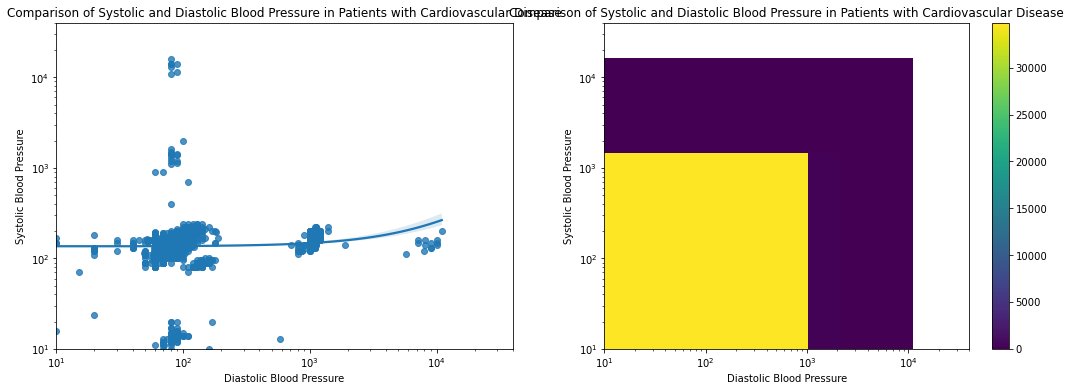

In [288]:
plt.figure(figsize = [18, 6])

#Scatterplot
plt.subplot(1, 2, 1)
sb.regplot(data = cardio_df, x = 'ap_lo', y = 'ap_hi', fit_reg=True)
plt.title('Comparison of Systolic and Diastolic Blood Pressure in Patients with Cardiovascular Disease')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e1, 4e4])
plt.ylim([1e1, 4e4])
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Systolic Blood Pressure');

#Heatmap
plt.subplot(1, 2, 2)
plt.hist2d(data = cardio_df, x = 'ap_lo', y = 'ap_hi')
plt.title('Comparison of Systolic and Diastolic Blood Pressure in Patients with Cardiovascular Disease')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e1, 4e4])
plt.ylim([1e1, 4e4])
plt.colorbar()
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Systolic Blood Pressure');


These plots show a cluster trend in blood pressures. The trendline in the scatter plot trendline is beneath the middle of the chart, showing that more patients with cardiovascular disease have a higher systolic blood pressure. Less than half of the patients with cardiovacluar disease had a high diastolic blood pressure. Thus, the systolic blood pressure is better indicator of cardiovacular disease than the diastolic blood pressure. 

### Question 3: Do the factors in this dataset accurately predict whether a not a patient has cardiovascular disease?

In [25]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [53]:
y = df.cardio
X = df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active']]

In [219]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Define model. Specify a number for random_state to ensure same results each run
cardio_model = DecisionTreeRegressor(random_state=1)

# Fit model
cardio_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [55]:
predictions = cardio_model.predict(X)

In [56]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, predictions)

0.00024285714285714286

The mean absolute error is very low, which indicates that there is very little error in the decision tree prediction.

In [220]:
text_representation = tree.export_text(cardio_model)
print(text_representation)

|--- feature_4 <= 129.50
|   |--- feature_0 <= 19960.50
|   |   |--- feature_6 <= 2.50
|   |   |   |--- feature_0 <= 16099.50
|   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |--- feature_4 <= 114.50
|   |   |   |   |   |   |--- feature_7 <= 1.50
|   |   |   |   |   |   |   |--- feature_3 <= 68.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 192.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 140.00
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 14759.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  14759.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 22
|   |   |   |   |   |   |   |   |   |--- feature_5 >  140.00
|   |   |   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |   |--- feature_2 >  192.50
|   |   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |   |--- feature_3 >  68.50

### Question 4: What is the relationship between age and cardiovascular disease?

In this dataset, age is measured in days. I am going to create an additional years column to make the visulization more understandable. I chose to divide the data by 365.25 to account for leap year days.

In [194]:
age_years = cardio_df['age'] / 365.25

In [268]:
describe_plus(cardio_df)

Describe:                  id           age        gender        height        weight  \
count  34979.000000  34979.000000  34979.000000  34979.000000  34979.000000   
mean   50082.102233  20056.813031      1.353441    164.270334     76.822368   
std    28834.739699   2315.927546      0.478045      8.270084     14.960125   
min        1.000000  14275.000000      1.000000     55.000000     10.000000   
25%    25272.500000  18387.000000      1.000000    159.000000     66.000000   
50%    50115.000000  20384.000000      1.000000    165.000000     75.000000   
75%    75027.500000  21899.000000      2.000000    170.000000     85.000000   
max    99998.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  34979.000000  34979.000000  34979.000000  34979.000000  34979.000000   
mean     137.212042    109.023929      1.517396      1.277595      0.083736   
std      191.289607    217.805266      0.

The average age of patients with cardiovascular disease is 55. The median age is 56. Since the median age is higher than the mean age, the age distribution is postively skewed.

Text(0, 0.5, 'Count')

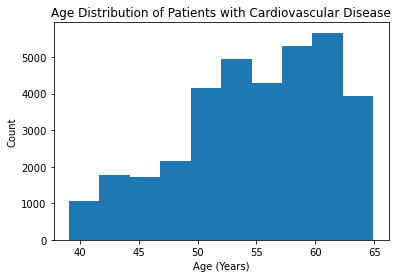

In [196]:
plt.hist(age_years)
plt.title('Age Distribution of Patients with Cardiovascular Disease')
plt.xlabel('Age (Years)')
plt.ylabel('Count')

This histogram shows the postively skewed data. Most patients with cardiovascular disease 55 or older.